In [24]:
from game.eval import get_results_df
from game.eval import Result # type: ignore

raw = get_results_df()


df = raw.query("timestamp >= '2024-11-24 21:33:00' and timestamp <= '2024-11-24 22:15:00'")

df['reason'].value_counts() # Did any model win? probably not! 
df.groupby('llm').size() # How many are in the game?

Found 119 results


llm
claude-3-5-haiku-20241022     10
claude-3-5-sonnet-20241022    10
gemini/gemini-1.5-flash       10
gemini/gemini-1.5-pro         10
gpt-4o-2024-11-20             10
gpt-4o-mini-2024-07-18        10
dtype: int64

/var/folders/32/4zq1qzj53lb2r_ybz99c5g440000gn/T/ipykernel_24808/812693834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["provider"] = df["llm"].map(get_provider)
/var/folders/32/4zq1qzj53lb2r_ybz99c5g440000gn/T/ipykernel_24808/812693834.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment="right")


,outcome,moves,time_taken_s,white,black,llm,stockfish_elo,timestamp,board_provided,n_moves,winner,reason,provider
59,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",4.887613,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:23.149040,False,8,stockfish_1500,invalid_moves,OpenAI
60,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",1.556061,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:25.100152,False,2,stockfish_1500,invalid_moves,OpenAI
61,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",3.181047,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:28.687241,False,5,stockfish_1500,invalid_moves,OpenAI
62,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",2.760112,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:31.852907,False,5,stockfish_1500,invalid_moves,OpenAI
63,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",3.737046,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:35.990724,False,6,stockfish_1500,invalid_moves,OpenAI
64,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",3.047058,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:39.443990,False,5,stockfish_1500,invalid_moves,OpenAI
65,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",7.869441,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:47.761933,False,15,stockfish_1500,invalid_moves,OpenAI
66,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",4.832417,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:53.058654,False,9,stockfish_1500,invalid_moves,OpenAI
67,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",2.831670,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:33:56.327963,False,5,stockfish_1500,invalid_moves,OpenAI
68,"{'termination': 'invalid_moves', 'winner_name'...","[{'from_square': 12, 'to_square': 28, 'promoti...",4.202761,gpt-4o-mini-2024-07-18,stockfish_1500,gpt-4o-mini-2024-07-18,1500,2024-11-24 21:34:00.948946,False,5,stockfish_1500,invalid_moves,OpenAI


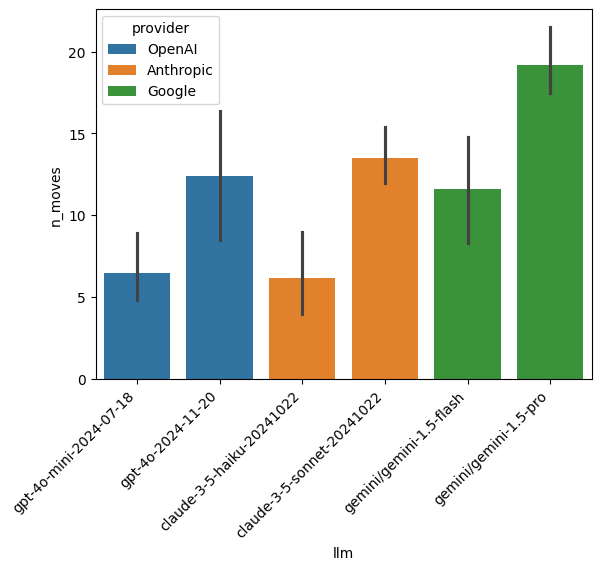

In [ ]:
import seaborn as sns
import re

PROVIDER_MAP = {"gpt": "OpenAI", "claude": "Anthropic", "gemini": "Google", "ollama": "Facebook", "together_ai": "Facebook"}

SPLIT_ON = r'[-/]'

def get_provider(llm: str):
    prefix = re.split(SPLIT_ON, llm)[0]
    return PROVIDER_MAP[prefix]

df["provider"] = df["llm"].map(get_provider)

plt = sns.barplot(df, x="llm", y="n_moves", hue="provider")


# rotate x labels
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment="right")

df